# Google Fiber Unsupervised Learning

**==========================================================================================================**

# Introduction to Unsupervised Learning

In this lab you will work with **unsupervised learning**. Unsupervised learning attempts to find inherent structure or relationships in complex data. Unsupervised learning does not use labeled cases in contrast with supervised learning. 

There are number of approaches to unsupervised learning. In this lab you will work with two widely used **clustering** methods, **K-means clustering** and **hierarchical**.

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import random

import datetime
from datetime import datetime, timedelta, date

#import os
#import zipfile
import scipy
from scipy import stats
import scipy.cluster.hierarchy as sch
from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set(style='darkgrid',font_scale=1.2)
plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift

from sklearn.metrics import silhouette_score

from sklearn.decomposition import KernelPCA, PCA
from sklearn.mixture import GaussianMixture

# (To create synthetic data)
# from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("googlefibermod.csv")

In [3]:
df.head()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,type4,type3,type5,type1,market1,market2
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,1,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,1
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,0,0,1,0,1,0
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,1
4,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0,1,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   contacts   1040 non-null   float64
 1   contacts1  1040 non-null   float64
 2   contacts2  1040 non-null   float64
 3   contacts3  1040 non-null   float64
 4   contacts4  1040 non-null   float64
 5   contacts5  1040 non-null   float64
 6   contacts6  1040 non-null   float64
 7   contacts7  1040 non-null   float64
 8   type4      1040 non-null   int64  
 9   type3      1040 non-null   int64  
 10  type5      1040 non-null   int64  
 11  type1      1040 non-null   int64  
 12  market1    1040 non-null   int64  
 13  market2    1040 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 113.9 KB


In [5]:
df.describe()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,type4,type3,type5,type1,market1,market2
count,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00,1040.00
mean,62.12,5.37,3.34,2.60,2.20,2.11,1.91,1.90,0.08,0.19,0.26,0.21,0.40,0.24
std,94.08,9.14,5.71,3.75,3.35,3.33,2.96,3.10,0.27,0.39,0.44,0.41,0.49,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,21.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,49.25,6.00,4.00,3.00,3.00,3.00,3.00,2.00,0.00,0.00,1.00,0.00,1.00,0.00
max,599.00,138.00,108.00,21.00,27.00,24.00,20.00,28.00,1.00,1.00,1.00,1.00,1.00,1.00


In [6]:
df.shape

(1040, 14)

In [7]:
X = df.iloc[:,0:14]

In [8]:
X.values

array([[  0.,   0.,   0., ...,   0.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       [166.,  12.,  13., ...,   0.,   1.,   0.],
       ...,
       [ 33.,   2.,   5., ...,   1.,   1.,   0.],
       [ 11.,   5.,   1., ...,   1.,   0.,   0.],
       [391.,  11.,   5., ...,   0.,   1.,   0.]])

**==========================================================================================================**

## Create the data

In practice, you'd have a dataset of real data, and you'd read in this data and perform EDA, data cleaning, and other manipulations to prepare it for modeling. For simplicity and to help us focus on the modeling itself, we're going to use synthetic data for this demonstration.

We'll start by creating a random number generator. This is to help with the process of creating _reproducible_ synthetic data. We'll use it to create clustered data without us knowing how many clusters there are.

In [ ]:
# Create random number generator
rng = np.random.default_rng(seed=0)

By calling the random number generator and assigning the result to a variable, we can avoid seeing the true number of clusters our data has. This keeps the "answer" a secret, and will let us use inertia and silhouette coefficients to determine it.

In [ ]:
# Create synthetic data w/ unknown number of clusters
centers = rng.integers(low=3, high=7)
X, y = make_blobs(n_samples=1000, n_features=6, centers=centers, random_state=0)

The above steps that generated our synthetic data return two things: `X` and `y`. `X` is an array of the values for the synthetic data itself and `y` is an array that contains the cluster assignment for each sample in `X` (represented as an integer).

Right now we're concerned with `X`, because it is our mystery data. It's currently an array, but it's usually helpful to view your data as a pandas dataframe. This is often how your data will be organized when modeling real-world data, so we'll convert our data to a pandas df.

In [ ]:
# Create Pandas dataframe from the data
X = pd.DataFrame(X)
X.head()

**==========================================================================================================**

## Scale the data

Since K-means uses distance between observations and centroids as its measure of similarity, it's important to scale your data before modeling, if it's not already scaled. It's important to scale because K-means doesn't know what your unit label is for each variable. Suppose you had data for penguins, and height were measured in meters and weight were measured in grams. Without scaling, significant differences in height would be represented as small numbers, while minor differences in weight would be represented as much larger numbers.

To perform scaling, we'll use scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#). StandardScaler scales each point xᵢ by subtracting the mean value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(x)) / σ

This ensures that, after scaling, each feature variable has a mean of 0 and variance/standard deviation of 1. There are a number of scaling techniques available, including `StandardScaler`, `MinMaxScaler`, `Normalizer`, and others, each scaling the data in a particular way. There's no hard rule for determining which method will work best, but with K-means models, using any scaler will almost always result in better results than not scaling at all. 

You can instantiate StandardScaler and transform your data in a single step by using the `.fit_transform()` method and passing to it your data as an argument.
<br />
<br />
**Tip:** If your computing environment has sufficient resources, it's helpful to keep an unscaled copy of your data to use later. Assign the scaled data to a new variable.

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled

array([[-0.6606193 , -0.58819836, -0.58605567, ..., -0.5164764 ,
         1.22966552, -0.56106274],
       [-0.6606193 , -0.58819836, -0.58605567, ..., -0.5164764 ,
        -0.81322927,  1.78233185],
       [ 1.10471335,  0.72522364,  1.69211358, ..., -0.5164764 ,
         1.22966552, -0.56106274],
       ...,
       [-0.30967968, -0.36929469,  0.29016327, ...,  1.9361969 ,
         1.22966552, -0.56106274],
       [-0.54363942, -0.0409392 , -0.41081188, ...,  1.9361969 ,
        -0.81322927, -0.56106274],
       [ 3.4974835 ,  0.6157718 ,  0.29016327, ..., -0.5164764 ,
         1.22966552, -0.56106274]])

**==========================================================================================================**

## K-means clustering

K-means clustering separates a dataset into K clusters of equal variance. The number of clusters, K, is user defined. The basic algorithm has the following steps:
1. A set of K centroids are randomly chosen. 
2. Clusters are formed by minimizing variance within each cluster. This metric is also know as the **within cluster sum of squares** (see further discussion in the section on evaluating clusters). This step partitions the data into clusters with minimum squared distance to the centroid of the cluster. 
3. The centroids are moved to mean of each cluster. The means of each cluster is computed and the centroid is moved to the mean. 
4. Steps 2 and 3 are repeated until a stopping criteria is met. Typically, the algorithm terminates when the within cluster variance decreases only minimally. 
5. The above steps are repeated starting with a random start of step 1. The best set of clusters by within cluster variance and between cluster separation are retained.  

Since K-means clustering relies only on basic linear algebra operations, the method is massively scalable. Out-of-core K-means clustering algorithms are widely used. However, this method assumes equal variance of the clusters, a fairly restrictive assumption. In practice, this criteria is almost never true, and yet K-means clustering still produces useful results. 

| Pros                                                  | Cons                                            |
| ----------------------------------------------------- | ----------------------------------------------- |
| Easy to implement                                     | Must manually chose K                           |
| Always converges to local minimum                     | Not guaranteed to find global minimum           |
| Scales well to large datasets                         | May not perform well on data of varying density |
| Generalizes to clusters of different shapes and sizes | Clusters are biased by outliers                 |

### Manual K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)

In [ ]:
kmeans.fit(X_scaled)

This returns a model object that has "learned" your data. You can now call its different attributes to see inertia, location of centroids, and class labels, among others. See the [K-means documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) for a full list of available attributes.

We can get the cluster assignments by using the `.labels_` attribute. Similarly, we can get the inertia by using the `.inertia_` attribute. 

Let's see what happens when we check the cluster assignments and inertia for this model.

The `.labels_` attribute returns a list of values that is the same length as the training data. Each value corresponds to the number of the cluster to which that point is assigned. Since our K-means model clustered the data into three clusters, the value assigned to each observation will be 0, 1, or 2. (Note that the cluster number itself is arbitrary, and serves only as a label.)  
<br/>

The `.inertia_` attribute returns the sum of the squared distances of samples from their closest cluster center.


In [ ]:
labels = kmeans.labels_
labels

In [ ]:
df["labels"] = kmeans.labels_

In [ ]:
#df["inertia"] = kmeans.inertia_

In [ ]:
df.head()

In [ ]:
centroids = kmeans.cluster_centers_
centroids

In [ ]:
# We can easily check the centroid values by averaging the features in each cluster.

df.groupby('labels').mean()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x="contacts", y="contacts7", hue="labels", data=df, palette="viridis")

ax.set_title("K-Means with 3 clusters", size=15)

plt.show()

## Evaluating cluster models

Now that you have created some clustering models, you are likely wondering how can you evaluate these models and perform model selection. There are a number of metrics you can use to evaluate and compare clustering models. However, you should always keep in mind that the best model, should be selected based on the problem you are trying to solve.

One useful metric for clusters is the **within cluster sum of squares** or **WCSS**. Intuitively, clusters should have minimal dispersion and therefore minimal WCSS. The  

$$WCSS = Min \sum_i \sum_{j\ in\ cluster\ i} ||x_j - c_i||^2 \\
where\\
c_i = center\ of\ ith\ cluster\\ 
and\\
||x_j - c_i|| = distance\ between\ data\ x_j\ and\ center\ c_i
$$

We can use WCSS to compare different cluster models. Models with smaller SSW have tighter clusters and, therefore smaller WCSS. 

****
**Note:** WCSS is also referred to as **inertia**. 
****

The **between cluster sum of squares** or **BCSS** is a related metric. Whereas WCSS measures how tight the clusters are BCSS is a measure of the separation between the clusters. To compute the BCSS, observe that the **total sum of squares** or **TSS** must equal the sum of the WCSS and BCSS:

$$
TSS = BCSS + WCSS\\
where\\
TSS = \sum_i (x_i - \mu)^2\\
where\\
\mu = mean\ of\ all\ data\ samples
$$

Notice that the TSS is just the variance of all data points. The BCSS is then just the difference between TSS and WCSS.

The **silhouette coefficient** or **SC** is another clustering metric. The silhouette coefficient measures the ratio between the distances within a cluster and distances to the nearest adjacent cluster. The SC for the $ith$ member of a cluster is computed as follows:

$$
SC_i = \frac{b_i -a_i }{max(a_i, b_i)}\\
where\\
a_i = average\ distance\ from\ point\ i\ to\ other\ members\ of\ the\ same\ cluster\\
b_i = average\ distance\ from\ point\ i\ to\ members\ of\ an\ adjacent\ cluster
$$

The SC has some important properties First, the SC values are limited as a result of the normalization:

$$\{ -1 \le SC \le 1 \}$$

For the case where the clusters are compact and well separated from adjacent clusters the following relationship holds:

$$if\ a_i \lt b_i\ then\ SC \gt 0$$

However,  for dispersed clusters that are not well separated from adjacent clusters the following relationship holds:

$$if\ a_i \gt b_i\ then\ SC \lt 0$$

In other words, the tighter the cluster and the further it is from members of the adjacent cluster. The closer the SC values will be to 1. However, if the cluster is dispersed and the distances to the adjacent cluster is small, the SC will have a value less than 0. 

In summary, you want to find a model with SC values close to 1. If the SC is consistently less than zero the clustering model is probably not that useful. 

****
**Note:** The WCSS and BCSS metrics have the concept of the clustering having multivariate-Normal distributions. Therefore, these metrics are strictly only applicable to K-means cluster. This fact means that WCSS and BCSS are not useful metrics for agglomerative clustering. The SC can be computed using various metrics so is more generally applicable to most clustering methods. 
****

## Elbow Method

In [12]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[14560.000000000005,
 9437.787054954051,
 8204.294093569208,
 7005.373789959954,
 5867.022310695138,
 5348.244328904981,
 4897.764660729148,
 4609.558580057246,
 4282.297666408109,
 4047.93329386571]

### Elbow plot

Now we can plot these values in a simple line graph, with the _k_ values along the x-axis and inertia on the y-axis. This type of plot is called an elbow plot. The "elbow" is usually the part of the curve with the sharpest angle, where the reduction in inertia that occurs when a new cluster is added begins to level off. 

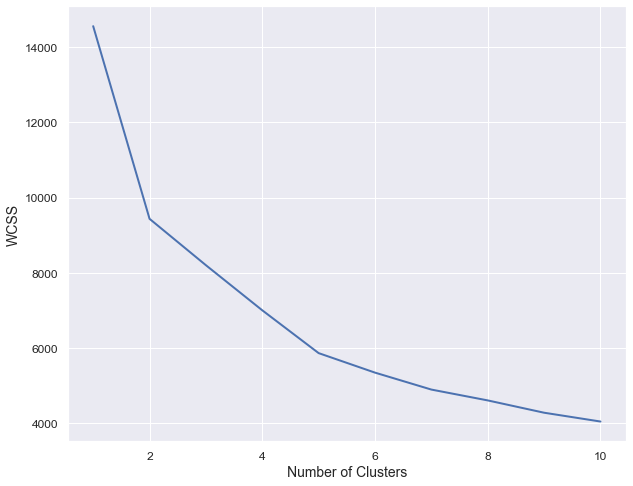

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(range(1,11), wcss, linewidth=2)
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("WCSS")

plt.show()

### Execute K-Means after determining the suitable cluster

In [15]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=1000, random_state=0)

In [16]:
kmeans.fit(X_scaled)

KMeans(max_iter=1000, n_clusters=2, random_state=0)

In [17]:
labels = kmeans.labels_
labels

array([0, 0, 1, ..., 0, 0, 1])

In [18]:
df["kmeanslabels"] = kmeans.labels_

In [19]:
df.head()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,type4,type3,type5,type1,market1,market2,kmeanslabels
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,1,0
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,0,0,1,0,1,0,1
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,1,0
4,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0,1,0,0,1,0,0


In [20]:
df.groupby(["kmeanslabels"]).mean()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,type4,type3,type5,type1,market1,market2
kmeanslabels,,,,,,,,,,,,,,
0,19.87,1.95,1.36,1.13,0.94,0.88,0.81,0.82,0.10,0.24,0.17,0.27,0.30,0.30
1,221.44,18.27,10.82,8.14,6.96,6.72,6.05,5.97,0.00,0.00,0.61,0.00,0.78,0.00


In [21]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.44932586, -0.37422136, -0.34749387, -0.39226502, -0.37704927,
        -0.36728469, -0.37166344, -0.34868785,  0.07861318,  0.12900698,
        -0.21478147,  0.13398927, -0.20930782,  0.14879766],
       [ 1.69424703,  1.41105485,  1.31027505,  1.47909102,  1.42171787,
         1.38489914,  1.40140987,  1.31477713, -0.29642218, -0.48643917,
         0.80986409, -0.5052256 ,  0.7892249 , -0.56106274]])

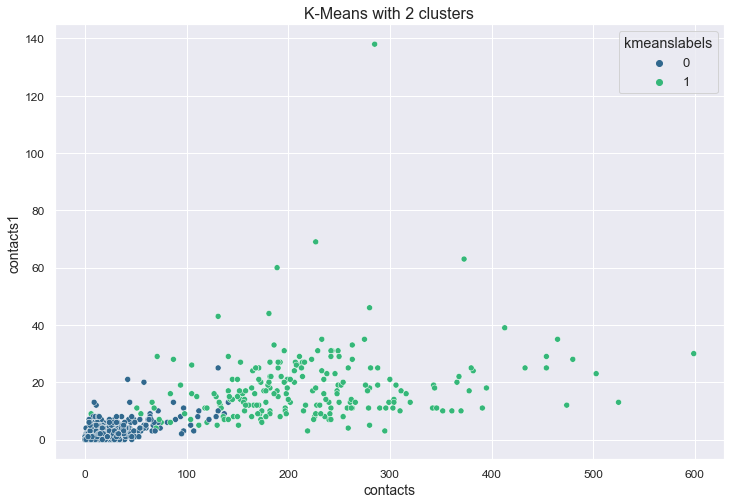

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x="contacts", y="contacts1", hue="kmeanslabels", data=df, palette="viridis", alpha=1.0)

ax.set_title("K-Means with 2 clusters", size=16)

plt.show()

## Evaluate inertia

This inertia value isn't helpful by itself. We need to compare the inertias of multiple _k_ values. To do this, we'll create a function that fits a K-means model for multiple values of _k_, calculates the inertia for each _k_ value, and appends it to a list.

In [ ]:
# Create a list from 2-10. 
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=0)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [ ]:
# Calculate inertia for k=2-10
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

In [ ]:
# Create a line plot.

### YOUR CODE HERE ###

plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

## Evaluate silhouette score

Unlike inertia, silhouette score doesn't have its own attribute that can be called on the model object. To get a silhouette score, we have to use the `silhouette_score()` function that we imported from `sklearn.metrics`. You must pass to it two required parameters: your training data and their assigned cluster labels. Let's see what this looks like for the `kmeans3` model we created earlier.

In [23]:
# Get silhouette score for kmeans3 model
kmeans_sil_score = silhouette_score(X_scaled, kmeans.labels_)
kmeans_sil_score

0.4176320393676966

In [24]:
num_clusters = [i for i in range(2, 11)]

def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=0)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

In [25]:
# Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.4176320393676966,
 0.24116305289218842,
 0.29591768154390913,
 0.37398137087443717,
 0.35098892340825355,
 0.3438323627562759,
 0.3333539271696128,
 0.3742741657270207,
 0.37924350757044095]

**==========================================================================================================**

## Agglomerative Clustering

In [26]:
agg = AgglomerativeClustering(n_clusters=3)

In [27]:
agg.fit(X_scaled)

AgglomerativeClustering(n_clusters=3)

In [28]:
labels = agg.labels_
labels

array([0, 0, 1, ..., 2, 2, 1], dtype=int64)

In [29]:
df["agglabels"] = labels

In [30]:
df.head()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,type4,type3,type5,type1,market1,market2,kmeanslabels,agglabels
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,1,0,0
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,0,0,1,0,1,0,1,1
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,1,0,2
4,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0,1,0,0,1,0,0,0


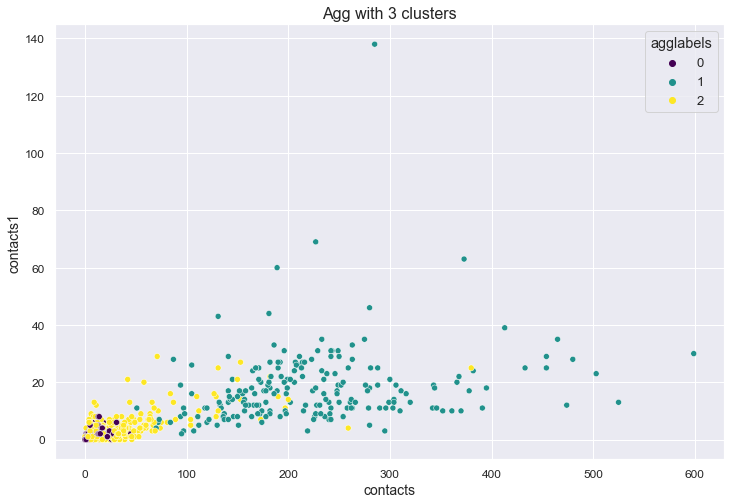

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x="contacts", y="contacts1", hue="agglabels", data=df, palette="viridis", alpha=1.0)

ax.set_title("Agg with 3 clusters", size=16)

plt.show()

**==========================================================================================================**

## Gaussian Mixture Models

## What are Gaussian Mixture Models (GMM)?

Put simply, Gaussian Mixture Models (GMM) is a clustering algorithm that:

- Fits a weighted combination of Gaussian distributions to your data
- The data scientist (you) needs to determine the number of gaussian distributions (`k`)

Hard vs Soft Clustering:

- __Hard clustering__ algorithms assign each data point to exactly one cluster.
- __Soft clustering__ algorithms return probabilities of each data point belonging to all `k` clusters

_GMM is a soft clustering algorithm._

With generated Gaussian mixture data, we know in advance the parameter values of the individual Gaussians. When we encounter a real-world dataset, how do we know the number of Gaussians to be included in the mixture model and their corresponding parameter values?

We can utilize the **GaussianMixture** class from **Scikit-learn**. This class allows us to estimate the parameters of a Gaussian mixture distribution.

A **GaussianMixture.fit** method is provided that learns a Gaussian Mixture Model from training data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the **GaussianMixture.predict** method.

To solve for the parameters of GMM, the **EM algorithm** is implemented. **E** stands for **Expectation** and **M** stands for **Maximization**. The algorithm works by alternating between an **E** step, which calculates the expectation of the log-likelihood of observing the dataset using the current parameter estimates, and a **M** step, which seeks new parameters estimates that maximize the expectation found in the previous E step. This process is repeated  until convergence.

One parameter you must specify when implementing a GMM is `n_components`, which tells the algorithm how many clusters to look for in the dataset. Another parameter you should consider is `covariance_type`, which we will talk about later with a multivariate dataset.

In [31]:
gm = GaussianMixture(n_components=3, random_state=0)

In [32]:
gm.fit(X_scaled)

GaussianMixture(n_components=3, random_state=0)

In [33]:
gmm_pred = gm.predict(X_scaled)

In [34]:
gmm_pred

array([0, 2, 1, ..., 0, 0, 1], dtype=int64)

In [35]:
df['gmmlabel'] = gmm_pred

In [36]:
df.head()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,type4,type3,type5,type1,market1,market2,kmeanslabels,agglabels,gmmlabel
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,1,0,0,2
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,0,0,1,0,1,0,1,1,1
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,1,0,2,2
4,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0,1,0,0,1,0,0,0,0


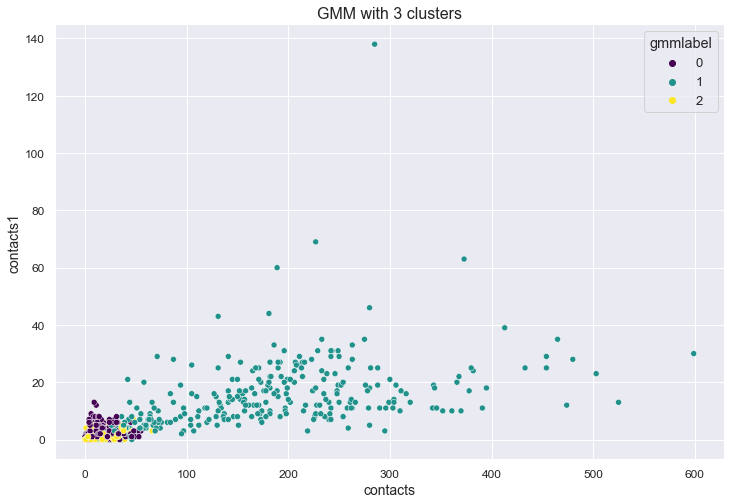

In [39]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x="contacts", y="contacts1", hue="gmmlabel", data=df, palette="viridis", alpha=1.0)

ax.set_title("GMM with 3 clusters", size=16)

plt.show()

**==========================================================================================================**

**==========================================================================================================**

#### Python code done by Dennis Lam